# PH2102 Electromagnetism

## Numerical methods and computation with Python

# Table of contents
1. [Mathematical Preliminaries](#mathprelims)
    1. [dot & cross products](#dotcross)
    2. [3D coordinate systems](#convert)
    3. [Fields and differential calculus](#vecfields)
        1. [Gradient](#grad)
        2. [Divergence](#div)
        3. [Curl](#curl)
    4. [Numerical integration](#numint)
        1. [1-dimensional integral](#1d)
        2. [Multi-dimensional integral](#multid)
        3. [Monte Carlo integration](#mc)
    5. [Gentle introduction to Symbolic Python](#sympy)
        1. [Differentiation](#diff)
        2. [Integration](#int)
        3. [Vector and scalar fields](#field)
        4. [Gradient, divergence and curl](#gdc)
        5. [Laplacian of 1/r](#lap_dirac)
        5. [Conservative vector field](#conserv)
        6. [Solenoidal field](#solen)
        7. [Scalar potential function](#scapot)
        8. [Line integral](#line)
        9. [Scalar potential difference](#scapotdiff)
2. [Electrostatics](#electrostatics)
    1. [Electric potential](#epot)
    2. [Laplace's equation](#laplace)
    3. [Poisson's equation](#poisson)
3. [Magnetostatics](#magnetostatics)

## 1. Mathematical Preliminaries<a name="mathprelims"></a>

### A. dot & cross products<a name="dotcross"></a>

The dot and cross products are 2 basic operations necessary in vector algebra. Their implementation in python is simple enough with the use of the ever helpful `scipy` library.

Let us start with simple 2-dimensional vectors $\vec{A}$ and $\vec{B}$,<br/>
where $\vec{A} = 1\hat{x} + 0\hat{y}$ and $\vec{B}$ is left to be defined by the user.

Run the code in the following cell.

In [1]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def interact_vec():

    def plot_vec(x,y):
        
        ## defining variables
        origin = [0], [0]
        A = [1, 0]
        B = [x, y]
        
        ## dot product
        C = dot(A, B)
        print('The dot product between vectors A and B is', C)
        
        ## Set plot axes, etc.
        plt.xlim(-11, 11)
        plt.ylim(-11, 11)
        plt.xticks(arange(-10, 11, step=5))
        plt.yticks(arange(-10, 11, step=5))
        plt.title(r"Vectors")
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        
        ## plotting
        plt.quiver(*origin, A[0], A[1], color='r', scale=10)
        plt.quiver(*origin, B[0], B[1], color='g', scale=10)
    
    ## interactive slider
    interact(plot_vec, x=FloatSlider(min=-3., max=3., step=0.1, value=1., continuous_update=False, description=r'x value of $\vec{B}$')
            , y=FloatSlider(min=-3., max=3., step=0.1, value=1., continuous_update=False, description=r'y value of $\vec{B}$'))

interact_vec();

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='x value of $\\vec{B}$', max…

Look at the code in the previous cell again. Can you identify where we have made used of `scipy`'s `dot` function for the calculation of dot products between 2 vectors? It should be easy to check that the returned value of the `dot` function in the above 2-dimensional case is correct. This is then easily extendable to a 3-dimensional case without loss of information.

Similarly, the cross product can be determined using `cross` function from `scipy` library. In the example cell below, set different values for $\vec{B}$ given $\vec{A} = 2\hat{x} + 0\hat{y} + 0\hat{z}$ and observe their cross product.

In [2]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

def interact_vec():
    ## Parameters
    camz, camera_angle = 20., 60.

    def plot_vec(x,y,z):
        
        ## defining variables
        origin = [0], [0], [0]
        A = [2, 0, 0]
        B = [x, y, z]
        
        ## cross product
        C = cross(A, B)
        print('Vector A cross B is', C)
        
        ## Set plot axes, etc.
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_xlim3d(-5, 5)
        ax.set_ylim3d(-5, 5)
        ax.set_zlim3d(-5, 5)
        ax.view_init(elev=camz, azim=camera_angle)
        ax.set_title(r"Vectors")
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        
        ##plotting
        ax.quiver(*origin, A[0], A[1], A[2], color="r")
        ax.quiver(*origin, B[0], B[1], B[2], color="g")
        ax.quiver(*origin, C[0], C[1], C[2], color="g")
        
    interact(plot_vec, x=FloatSlider(min=-5., max=5., step=0.1, value=1., continuous_update=False, description=r'x value of $\vec{B}$')
            , y=FloatSlider(min=-5., max=5., step=0.1, value=1., continuous_update=False, description=r'y value of $\vec{B}$')
            , z=FloatSlider(min=-5., max=5., step=0.1, value=1., continuous_update=False, description=r'z value of $\vec{B}$'))

interact_vec();

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='x value of $\\vec{B}$', max…

Exercise 1) Prove, in the cell below, the __vector triple product__ rule i.e. $\vec{A} \times (\vec{B} \times \vec{C}) = \vec{B}(\vec{A} \cdot \vec{C}) - \vec{C}(\vec{A} \cdot \vec{B})$ given the values of $\vec{A}, \vec{B}$ and $\vec{C}$.

_*Hint: Evaluate and compare LHS with RHS._

In [3]:
from scipy import *

A = array([2, 0, 0])
B = array([0, 2, 0])
C = array([1, 1, 1])

## edit your code here

Double-click <b>here</b> for the solution.

<!-- The answer is below:

from scipy import *

A = array([2, 0, 0])
B = array([0, 2, 0])
C = array([1, 1, 1])

## ans
LHS = cross(A, cross(B, C))
RHS = B*dot(A, C) - C*dot(A, B)

print('LHS =', LHS)
print('RHS =', RHS)

if all(LHS) == all(RHS):
    print('Proven!')
else:
    print('Try again.')
    
-->

Exercise 2) Let us try to retrieve the angle $\theta$ formed by 2 vectors $\vec{A}$ and $\vec{B}$ in $R^3$ space, given the values of $\vec{A}$ and $\vec{B}$. Implement your code in the cell below.

_*Hint: recall $\vec{v}\cdot\vec{v}=|v|^2$ and $\vec{A}\cdot\vec{B}=|A||B|cos\theta$._

In [4]:
A = array([1, 0, 0])
B = array([-1, 0, 0])

## get magnitude of a vector

## get the angle theta between 2 vectors

Double-click <b>here</b> for the solution.

<!-- The answer is below:

import math

A = array([1, 0, 0])
B = array([-1, 0, 0])

## get magnitude of a vector
def length(v):
  return sqrt(dot(v, v))

## get the angle theta between 2 vectors
def angle(v1, v2):
  return arccos(dot(v1, v2) / (length(v1) * length(v2)))

print('The angle between vectors A and B is', angle(A,B), 'rads', 'or', math.degrees(angle(A,B)), 'degrees.')

-->

### B. 3D coordinate systems<a name="convert"></a>

Often times, it is handy to describe the geometry of a particular system in coordinates that allows for exploitation of its symmetry. The following cells demonstrates some simple functions that convert between cartesian, cylindrical and spherical coordinates.

#### Cartesian - Cylindrical

In [5]:
## s is a cartesian coordinate given by [x,y,z]
def cart2cyl(s):
    rho = sqrt(s[0]**2 + s[1]**2)
    phi = arctan2(s[1], s[0])
    z = s[2]

    return [rho, phi, z]

## s is a cylindrical coordinate given by [rho,phi,z]
def cyl2cart(s):
    x = s[0] * cos(s[1])
    y = s[0] * sin(s[1])
    z = s[2]

    return [x, y, z]

#### Cartesian - Spherical
Exercise 3) Write 2 functions in the cell below that accomplish the conversion from cartesian to spherical coordinates and vice versa.

In [ ]:
## s is a cartesian coordinate given by [x,y,z]
def cart2sph(s):
    ## edit your code here
    #return [r, theta, phi]

## s is a spherical coordinate given by [r,theta,phi]
def sph2cart(s):
    ## edit your code here
    #return [x, y, z]

Double-click <b>here</b> for the solution.

<!-- The answer is below:
    
## s is a cartesian coordinate given by [x,y,z]
def cart2sph(s):
    r = sqrt(s[0]**2 + s[1]**2 + s[2]**2)
    phi = arctan2(s[1], s[0])
    theta = arctan2(sqrt(s[0]**2 + s[1]**2), s[2])

    return [r, theta, phi]

## s is a spherical coordinate given by [r,theta,phi]
def sph2cart(s):
    x = s[0] * sin(s[1]) * cos(s[2])
    y = s[0] * sin(s[1]) * sin(s[2])
    z = s[0] * cos(s[1])

    return [x, y, z]

-->

### C. Fields and differential calculus<a name="vecfields"></a>

Now that we have become familiar with vectors, we turn our attention to vector fields. When dealing with vector fields, there are a couple of differential operations we can perform, namely: gradient, divergence and curl.

#### Gradient<a name="grad"></a>

`gradient` from `scipy` library returns the gradient of a scalar function, which is itself a vector field. The cell below demonstrates a simple example of computing the gradient of an arbitrary scalar field, and its plot visualisation using `matplotlib`'s `quiver`function. 

Additionally, note the usage of `scipy`'s `meshgrid` to create the 2-dimensional grid points. We also make used of the `contour` function from `matplotlib` library to plot the scalar function, very much analogous to a topographic map. 

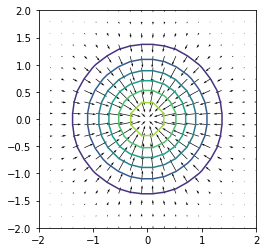

In [7]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## set up the co-ordinates
x = linspace(-2., 2., 20)
y = linspace(-2., 2., 20)
X, Y = meshgrid(x, y)

## an arbitrary scalar function
Z = exp(-X**2 - Y**2)

## gradient of scalar field
gy, gx = gradient(Z) 
# Indexing is ordered left to right (rows followed by columns). 
# Thus the y-axis gradient (evaluated across rows) is returned first.

## setting up plot
plt.gca().set_aspect('equal', adjustable='box')

## plotting the gradient (which is a vector field)
plt.contour(X, Y, Z) # scalar function
plt.quiver(X, Y, gx, gy)

#### Divergence<a name="div"></a>

The divergence of a vector function is itself a scalar field, and its plot visualisation can be done using `matplotlib`'s `plot_surface`. Unfortunately, `scipy` does not have a built-in divergence function we can call. However, we can define our own divergence function based on the expression $\nabla \cdot \vec{V} = \frac{\partial V_{x}}{\partial x} + \frac{\partial V_{y}}{\partial y} + \frac{\partial V_{z}}{\partial z}$

Exercise 4) Write a `python` function that returns the divergence of an input vector field. _(challenging)_

In [8]:
def divergence(f):
    """
    Computes and return a single array of the same shape as each of the items in f 
    i.e. the divergence of the vector field f, dFx/dx + dFy/dy + ...
    
    f: List of arrays, where every item of the list is one dimension of the vector field
    """
    # edit your code here
    
    return div

Double-click <b>here</b> for the solution.

<!-- The answer is below:

from scipy import *

def divergence(f):
    """
    Computes and return a single array of the same shape as each of the items in f 
    i.e. the divergence of the vector field f, dFx/dx + dFy/dy + ...
    
    f: List of arrays, where every item of the list is one dimension of the vector field
    """
    num_dims = len(f)
    grad = [None] * num_dims
    for i in range(num_dims):
        grad[i] = gradient(f[num_dims - i - 1], axis=i)
        
    div = add.reduce(grad)
    
    return div

-->

Now that we have the user-defined `divergence` function, the cell below demonstrates a simple example of plot visualisation for divergence of an arbitrary vector field using `matplotlib`'s `plot_surface`.

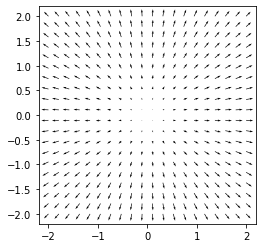

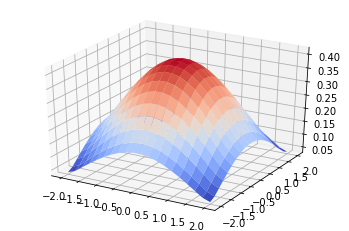

In [9]:
# with answer for divergence

%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## set up the co-ordinates
x = linspace(-2., 2., 20)
y = linspace(-2., 2., 20)
X, Y = meshgrid(x, y)

## an arbitrary vector function
alpha = 3
r2 = X**2 + Y**2
Ax = exp(-r2/alpha**2)*X
Ay = exp(-r2/alpha**2)*Y

## divergence of vector field
def divergence(f):
    """
    Computes and return a single array of the same shape as each of the items in f 
    i.e. the divergence of the vector field f, dFx/dx + dFy/dy + ...
    
    f: List of arrays, where every item of the list is one dimension of the vector field
    """
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[num_dims - i - 1], axis=i) for i in range(num_dims)]) #1-line for brevity

field = [Ax, Ay]
div = divergence(field)

## plot of vector function
plt.gca().set_aspect('equal', adjustable='box')
plt.quiver(X, Y, Ax, Ay)

## plotting the divergence (which is a scalar field)
ax = plt.figure().gca(projection = '3d')
ax.plot_surface(X, Y, div, cmap=cm.coolwarm, linewidth=1, antialiased='True')

#### Curl<a name="curl"></a>

The curl of a vector function is itself a vector field. Regrettably, `scipy` module also does not have a built-in curl function. Fortunately, we can define our own curl function based on the expression
$\nabla \times \vec{V} = \left(\frac{\partial V_{z}}{\partial y} - \frac{\partial V_{y}}{\partial z}\right)\hat{x} + \left(\frac{\partial V_{x}}{\partial z} - \frac{\partial V_{z}}{\partial x}\right)\hat{y} + \left(\frac{\partial V_{y}}{\partial x} - \frac{\partial V_{x}}{\partial y}\right)\hat{z}$

Exercise 5) Write a `python` function that returns the curl of an input vector field. _(challenging)_

_*Hint: explore the `Jacobian` function from `numdifftools` library. Check out the [online documentation](https://numdifftools.readthedocs.io/en/latest/reference/numdifftools.html#module-numdifftools.core). You need to have `numdifftools` library installed._

In [10]:
def curl(f, x):
    # edit your code here
    return c

Double-click <b>here</b> for the solution.

<!-- The answer is below:
    
from scipy import *
import numdifftools as nd

def curl(f, x):
    """
    Computes and return a single array of same shape as x
    i.e. the curl of the vector field f
    
    f: function, in x, of vector field, where x[0], x[1], x[2] correspond to each dimension
    x: array of cartesian coordinates in 3 dimensions
    """
    jac = nd.Jacobian(f)(x)
    return array([jac[2,1]-jac[1,2], jac[0,2]-jac[2,0], jac[1,0]-jac[0,1]])

-->

Now that we have the user-defined curl function, the cell below demonstrates a simple example of computing the curl of an arbitrary vortex vector field, and its plot visualisation using `matplotlib`'s `quiver`.

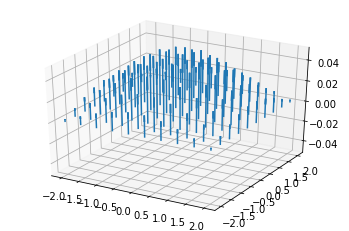

In [11]:
# with answer for curl

%matplotlib inline
from scipy import *
import numdifftools as nd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## set up the co-ordinates
lx, ly, lz = 10, 10, 10
x = linspace(-2., 2., lx)
y = linspace(-2., 2., ly)
z = linspace(0., .1, lz)
X, Y, Z = meshgrid(x, y, z, indexing='ij')

## vortex vector field
def v1(x):
    return array([ exp((-x[0]**2 - x[1]**2)/9) * -x[1], exp((-x[0]**2 - x[1]**2)/9) * x[0], 0 ])

def curl(f,x):
    jac = nd.Jacobian(f)(x)
    return array([jac[2,1]-jac[1,2],jac[0,2]-jac[2,0],jac[1,0]-jac[0,1]])

c_res = zeros((lx,ly,lz,3))
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            r = array([ x[i], y[j], z[k] ])
            c = curl(v1, r)
            c_res[i,j,k,0] = c[0]
            c_res[i,j,k,1] = c[1]
            c_res[i,j,k,2] = c[2]

## plotting the curl (which is a vector field) at z=0 
ax = plt.figure().gca(projection = '3d')
ax.quiver(X[:,:,0], Y[:,:,0], Z[:,:,0], c_res[:,:,0,0], c_res[:,:,0,1], c_res[:,:,0,2], arrow_length_ratio=.3, length=.03)

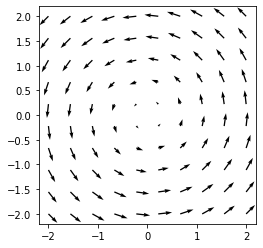

In [12]:
## plotting the vortex vector field
X, Y = meshgrid(x, y)

plt.gca().set_aspect('equal', adjustable='box')
plt.quiver(X, Y, v1([X,Y])[0], v1([X,Y])[1])

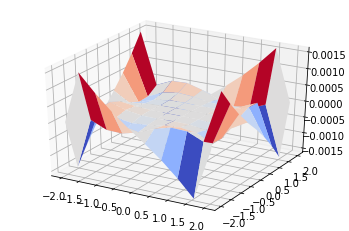

In [13]:
%matplotlib inline

field = [v1([X,Y])[0], v1([X,Y])[1]]
div = divergence(field)

## plotting the divergence (which is a scalar field)
ax = plt.figure().gca(projection = '3d')
ax.plot_surface(X, Y, div, cmap=cm.coolwarm, linewidth=1, antialiased='True')

Question: Do you know why we call for a seperate 2D meshgrid for the vortex vector field plot?

### D. Numerical integration<a name="numint"></a>

Integrals appear in almost all physics and engineering problems but in many cases of practical importance, they are not analytically tractable. Numerical evaluations of such integrals become essential. Several algorithms have been developed to accomplish this goal with increasing levels of accuracy. You should have come across the basic trapezoidal and Simpson's rule during lecture. Further dicussions can be made about singularities in integral functions, discretization errors and advanced methods to extrapolate these errors to arbitrarily high orders for a more accurate integral approximation (Romberg integration etc.). But for the purpose of this course, we will focus on implementing numerical integration in python and leave the algorithm analysis to a computational physics course.

#### 1-dimensional integral<a name="1d"></a>
Numerical integration in 1 dimension is easily accomplish with `quad` function call from `scipy`'s `integrate` module. Let us see this in action with the simple example below.

Evaluate 
<h3 align="center">$y=\int^{1}_{0}x\,dx$</h3>

Recall that area of a triangle = $\frac{base\times height}{2}$

In [14]:
from scipy import integrate

## x domain
low_lim = 0
upp_lim = 1

## define integrand
def integrand(x):
    return x

## perform integration
integral = integrate.quad(integrand,low_lim,upp_lim)

## retrieve ans
y = integral[0]
print('y =',y)

y = 0.5


See Chapter 3. [Magnetostatics](#magnetostatics) for exercise questions regarding numerical integrations with `scipy.integrate.quad`.

#### Multi-dimensional integral<a name="multid"></a>
We can extend the method explored above for a single integral to a double or triple integral, by calculating "dimension-by-dimension". Fortunately, we can achieved this fairly easily with `scipy.integrate.nquad`. Let us look at a demonstration with a simple example below.

Calculate the area of a square, in the domain $0\leq x,y\leq1$,
<h3 align="center">Area $=\int\limits_{0}^{1} \int\limits_{0}^{1}1\,dy\,dx$</h3>


In [15]:
## x domain
x_domain = [0,1]

## y domain
y_domain = [0,1]

## define integrand
def integrand(x,y):
    return 1

## perform integration
integral = integrate.nquad(integrand,[x_domain, y_domain])

## retrieve ans
area = integral[0]
print('Area of a unit square =',area)

Area of a unit square = 1.0


#### Monte Carlo integration<a name="mc"></a>
Repeated use of one-dimensional integration rules to handle double and triple integrals constitute a working strategy only if the integration domain is a rectangle or box. For any other shape of domain, completely different methods must be used. A common approach for two- and three-dimensional domains is to divide the domain into many small triangles or tetrahedra and use numerical integration methods for each triangle or tetrahedron. The overall algorithm and implementation is too complicated to be addressed in this course. Instead, we shall employ an alternative known as Monte Carlo integration, one that is simple and general in applications.

Monte Carlo integration is a stochastic process i.e. based on random numbers. Random numbers are generated using `rand()` function call from `numpy`'s `random` module. The cell below demonstrates Monte Carlo integration method by calculating the area of a unit circle, given its equation 
<h3 align="center">$x^2 + y^2 = 1$</h3>

Area of unit circle = 3.144


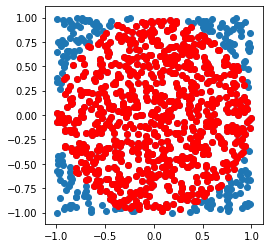

In [5]:
import numpy.random as rndm

def area_circle(N):
    
    ## Initialising arrays and values
    points = zeros((N, 2))
    points_circle = zeros((N, 2))
    count = 0
    
    ## Sampling N random points in square domain of -1 <= x,y <= 1
    for i in range(N):

        x = -1 + 2*rndm.rand()
        y = -1 + 2*rndm.rand()
        points[i] = [x, y]

        if x**2 + y**2 <= 1 : # circle condition
            points_circle[count] = [x, y]
            count += 1
    ## area of square domain
    square_domain = 4
    est_area = square_domain * count / N

    return [est_area, points_circle, points]

[area, points_red, points] = area_circle(1000)

print('Area of unit circle =',area)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(points[:,0], points[:,1])
plt.scatter(points_red[:,0], points_red[:,1], c='r')

### E. Gentle introduction to Symbolic Python<a name="sympy"></a>

For this section, you need `sympy` library installed for `python`. `sympy` deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly and mathematical expressions with unevaluated variables are left in symbolic form. Before you dive headfirst into using `sympy` for all of your analytical solutions however, it is unfortunate that many of the sophisticated mathematical expressions (e.g. complex multi-dimensional differential equations) in physics remain a work in progress in `sympy` implementation. Always check `sympy`'s [online documentation](https://docs.sympy.org/latest/index.html) for an update on its current functionalities.

`sympy`'s functions, variables, and even floats aren't the same as `numpy`/ `scipy` analogues. For example 
>sympy.exp() $\neq$ scipy.exp()

In [17]:
import sympy as sym

sym.exp(3)

exp(3)

Symbols that are going to used as symbolic variable must be declared as such.

In [18]:
x = sym.symbols('x')
sym.exp(x)

exp(x)

Let take a look at assigning values to symbolic variables using the `subs` function.

In [19]:
sym.exp(x).subs({x:3})

exp(3)

To evaluate the numerical value of a `sympy` expression, use the `evalf` function (alternatively, just use decimal point when declaring/assigning numerical values.)

In [20]:
sym.exp(3).evalf(), sym.exp(3.), sym.exp(x).subs({x:3.})

(20.0855369231877, 20.0855369231877, 20.0855369231877)

`sympy` is able to convert some standard variables to LaTeX output (how you usually see them in textbooks).

In [21]:
sym.init_printing() # for LaTeX formatted output

Sigma, Sigma_p = sym.symbols('Sigma, \Sigma^{\prime}')

Sigma, Sigma_p, sym.pi, sym.E

One consequence of `sympy`'s symbolic expressions is they must be turned into `scipy`/ `numpy` expressions if they are to be evaluated for plotting or numerical results. This is done with the `lambdify` function call.

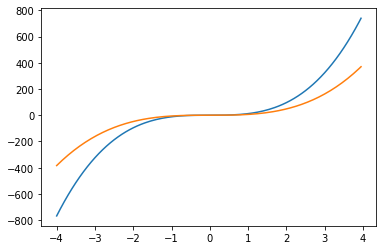

In [22]:
x, y = sym.symbols('x, y')
f = 12*x**3
g = 12*x**3 * sym.exp(y)

f = sym.lambdify(x, f) # turns sympy expression f into a function f(x) for use in scipy/numpy
g = sym.lambdify((x, y), g) # turns sympy expression g into function g(x,y) for use in scipy/numpy

xx = arange(-4, 4, 0.05) # xx so that it doesn't collide with symbolic x
A = f(xx)
B = g(xx, log(1/2))
plt.plot(xx, A)
plt.plot(xx, B)

#### Differentiation<a name="diff"></a>
`sympy` can handle symbolic differentiation of various orders with `diff`.

In [23]:
x, y, z = sym.symbols('x, y, z')
func = sym.cos(x)**2 # scipy trig functions won't work!

## First derivative in x
print(sym.diff(func, x))

## 2nd order derivative in x
print(sym.diff(func, x, x))

-2*sin(x)*cos(x)
2*(sin(x)**2 - cos(x)**2)


Exercise 6) Evaluate symbolically
<h3 align="center">$\frac{\partial^3 e^{xyz}}{\partial^2 x \partial y}$</h3>

Double-click <b>here</b> for the solution.

<!-- The answer is below:

h = sym.exp(x*y*z)
sym.diff(h, x, x, y)

-->

#### Integration<a name="int"></a>
Likewise, `sympy` can handle symbolic integration of various orders with `integrate`. Let's evaluate the following integral:
<h3 align="center">$\int sin(xy)+cos(yz)\, dx$</h3>

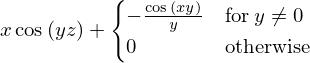

In [24]:
x, y, z = sym.symbols('x, y, z')
f = sym.sin(x*y) + sym.cos(y*z)
sym.integrate(f, x)

Now, let's turn it into a definite integral:
<h3 align="center">$\int_{-1}^{1} sin(xy)+cos(yz)\, dx$</h3>

In [25]:
sym.integrate(f,(x,-1,1))

Let's turn our attention to a double integral with infinity as limits:
<h3 align="center">$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2 -y^2} dxdy$</h3>

In [26]:
sym.integrate(sym.exp(-x**2 - y**2), (x, -sym.oo, sym.oo), (y, -sym.oo, sym.oo))

#### Vector and scalar fields<a name="field"></a>
To define a vector field, declare a reference frame, R, using `ReferenceFrame` from `sympy.physics.vector` submodule and initialise the basis vectors with R.x, R.y and R.z respectively.

In [27]:
from sympy.physics.vector import ReferenceFrame

R = ReferenceFrame('R')
vector_field = 3*R.x + 4*R.y + 5*R.z
vector_field

To define a scalar field, the base scalars (coordinate variables) can be initialised with R[0], R[1] and R[2] instead.

In [28]:
R = ReferenceFrame('R')
scalar_field = 2*R[0]**2*R[1]
scalar_field

Scalar fields are just like any other `sympy` expression. When performing operations such as differentiation, just remember to replace any coordinate variables x, y and z with R[0], R[1] and R[2].

In [29]:
sym.diff(scalar_field, R[0])

#### Gradient, divergence and curl<a name="gdc"></a>
`sympy` has helpful functions for calculating the gradient, divergence and curl of a field, using `grad`, `div` and `curl` function calls respectively.

Recall our previous example for __gradient__.

In [30]:
from sympy.physics.vector import gradient

R = ReferenceFrame('R')
scalar_field = sym.exp(-R[0]**2 - R[1]**2)
g = gradient(scalar_field, R)
g

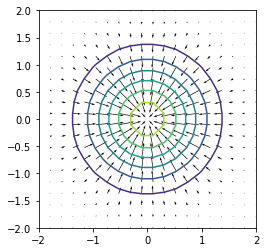

In [31]:
%matplotlib inline
sym.init_printing() # for LaTeX formatted output
from sympy.physics.vector import gradient

## set up the co-ordinates
x = linspace(-2., 2., 20)
y = linspace(-2., 2., 20)
X, Y = meshgrid(x, y)

## seperating into components for the gradient
x_component = g.to_matrix(R)[0]
y_component = g.to_matrix(R)[1]

## converting to scipy/ numpy expressions
grad_x = sym.lambdify((R[0], R[1]), x_component)
grad_y = sym.lambdify((R[0], R[1]), y_component)
Z = sym.lambdify((R[0], R[1]), scalar_field)

## setting up plot
plt.gca().set_aspect('equal', adjustable='box')

## plotting the gradient (which is a vector field)
plt.contour(X, Y, Z(X, Y)) # analogous to a topographic map
plt.quiver(X, Y, grad_x(X, Y), grad_y(X, Y))

Exercise 7) Produce the same surface plot for our __divergence__ example above, this time using `sympy` library.

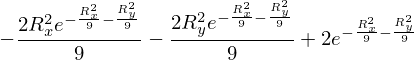

In [32]:
## Answer

from sympy.physics.vector import divergence

R = ReferenceFrame('R')

alpha = 3
r2 = R[0]**2 + R[1]**2
Ax = sym.exp(-r2/alpha**2)*R[0]
Ay = sym.exp(-r2/alpha**2)*R[1]

vector_field = Ax*R.x + Ay*R.y
d = divergence(vector_field, R)
d

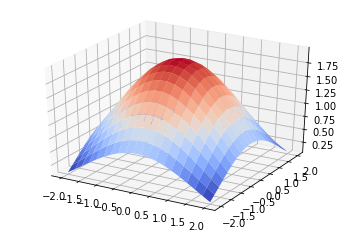

In [33]:
%matplotlib inline
sym.init_printing() # for LaTeX formatted output
from sympy.physics.vector import divergence

## set up the co-ordinates
x = linspace(-2., 2., 20)
y = linspace(-2., 2., 20)
X, Y = meshgrid(x, y)

## converting to scipy/ numpy expressions
d = sym.lambdify((R[0], R[1]), d)

## setting up plot
ax = plt.figure().gca(projection = '3d')

## plotting the divergence (which is a scalar field)
ax.plot_surface(X, Y, d(X, Y), cmap=cm.coolwarm, linewidth=1, antialiased='True')

Exercise 8) Let's replicate the result from our __curl__ example using `sympy`.

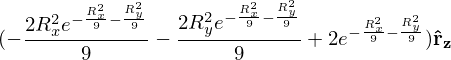

In [34]:
##Answer

from sympy.physics.vector import curl

R = ReferenceFrame('R')
vector_field = sym.exp((-R[0]**2 - R[1]**2)/9) * (-R[1]*R.x + R[0]*R.y)
c = curl(vector_field, R)
c

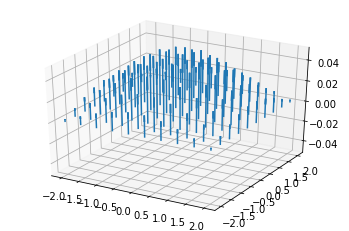

In [35]:
%matplotlib inline
from sympy.physics.vector import curl

## set up the co-ordinates
x = linspace(-2., 2., 10)
y = linspace(-2., 2., 10)
z = linspace(0., .1, 10)
X, Y, Z = meshgrid(x, y, z, indexing='ij')

## seperating into components for the curl
x_component = c.to_matrix(R)[0]
y_component = c.to_matrix(R)[1]
z_component = c.to_matrix(R)[2]

## seperating into components for the original vector field
x_comp = vector_field.to_matrix(R)[0]
y_comp = vector_field.to_matrix(R)[1]
z_comp = vector_field.to_matrix(R)[2]

## converting to scipy/ numpy expressions
c_x = sym.lambdify((R[0], R[1], R[2]), x_component)
c_y = sym.lambdify((R[0], R[1], R[2]), y_component)
c_z = sym.lambdify((R[0], R[1], R[2]), z_component)
A = sym.lambdify((R[0], R[1]), x_comp)
B = sym.lambdify((R[0], R[1]), y_comp)
C = sym.lambdify((R[0], R[1]), z_comp)

## setting up plot
ax = plt.figure().gca(projection = '3d')

## plotting the curl (which is a vector field)
ax.quiver(X[:,:,0], Y[:,:,0], Z[:,:,0], c_x(X[:,:,0], Y[:,:,0], Z[:,:,0]), c_y(X[:,:,0], Y[:,:,0], Z[:,:,0]), c_z(X[:,:,0], Y[:,:,0], Z[:,:,0]), arrow_length_ratio=.3, length=.03)

#ax.quiver(X[:,:,0], Y[:,:,0], Z[:,:,0], A(X[:,:,0], Y[:,:,0]), B(X[:,:,0], Y[:,:,0]), C(X[:,:,0], Y[:,:,0]), arrow_length_ratio=.02, length=.5)

#### Laplacian of 1/r<a name="lap_dirac"></a>

We see in the lectures that the laplacian of $\frac{1}{r}$ deserves special treatment, and its analytical solution is given as
<h3 align="center">$\nabla^2 \frac{1}{r}=-4\pi \delta^3(\vec{r})$</h3>

Let us see how does `sympy` handles such a situation.

In [36]:
R = ReferenceFrame('R')
scalar_field = 1/sym.sqrt(R[0]**2+R[1]**2+R[2]**2)
g = gradient(scalar_field, R)
f = divergence(g, R)
sym.simplify(f)

_*Attention: We need to note that `sympy` correctly gives us $0$ for $r \neq 0$, but does not recognise the solution to $\nabla^2 \frac{1}{r}$ at the singularity point $r=0$._

#### Conservative vector field<a name="conserv"></a>

A vector field is conservative when it is the gradient of some scalar field. The line integral of a conservative vector field is independent of the path but depends only on the end-points. A conservative vector field is also said to be ‘irrotational’, since the curl of a conservative field is always zero. To check if a vector field is conservative, we can just call the `is_conservative` function from `sympy.physics.vector` submodule without explicitly solving for its curl.

In [37]:
from sympy.physics.vector import is_conservative

R = ReferenceFrame('R')
vector_field = R[1]*R[2]*R.x + R[0]*R[2]*R.y + R[0]*R[1]*R.z
is_conservative(vector_field)

True

#### Solenoidal vector field<a name="solen"></a>
A vector field is solenoidal when its divergence is zero at all points in space. To check if a vector field is solenoidal, we call the `is_solenoidal` function from `sympy.physics.vector` submodule.

In [38]:
from sympy.physics.vector import is_solenoidal

R = ReferenceFrame('R')
vector_field = R[1]*R[2]*R.x + R[0]*R[2]*R.y + R[0]*R[1]*R.z
is_solenoidal(vector_field)

True

####  Scalar potential function<a name="scapot"></a>
A conservative vector field is the gradient of some scalar field. This scalar field is called the scalar potential field. The `scalar_potential` function in `sympy.physics.vector` submodule calculates the scalar potential field corresponding to a given conservative vector field (sans the extra constant of integration).

In [39]:
from sympy.physics.vector import scalar_potential

R = ReferenceFrame('R')
cons_field = 4*R[0]*R[1]*R[2]*R.x + 2*R[0]**2*R[2]*R.y + 2*R[0]**2*R[1]*R.z
scalar_potential(cons_field, R)

#### Line integral<a name="line"></a>
The complex geometry of surface and volume integrals are problems best suited for numerical integration techniques like the monte carlo integration. Line integrals, however, can be computed symbolically with `sympy`. Let us take a look at an example. 

<h3 align="center">$\int_{r_1}^{r_2}\vec{v}(r) \cdot d\vec{l}$</h3>

given a vector field $\vec{v}(r) = xy \, \hat{x} + 2yz \, \hat{y} + 3xz \, \hat{z}$ and a path $\vec{l}$ parametrized in terms of a variable $t$ that runs from 0 to 1 i.e. $\vec{l}(0)=r_1$ and $\vec{l}(1)=r_2$. The paths need to be parametrized in terms of cartesian basis vectors in `sympy`. Let us see the results for 3 different paths.

<h3 align="center">$l_1 = 2t \, \hat{y}$</h3>
<h3 align="center">$l_2 = 2(1-t) \, \hat{y} + 2t \, \hat{z}$</h3>
<h3 align="center">$l_3 = 2(1-t) \, \hat{z}$</h3>

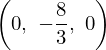

In [40]:
import sympy as sym
import sympy.vector as sv 
sym.init_printing # for LaTeX formatted output

x, y, z, t = sym.symbols('x, y, z, t')
R = sv.CoordSys3D('R') # cf ReferenceFrame of sympy.physics.vector

## defining vector field as a function of scalar variables x,y,z
def v(x, y, z):
    return x*y*R.i + 2*y*z*R.j + 3*x*z*R.k

## defining vector field along path l as a function of t
def vpath(l):
    x, y, z = (l.dot(R.i), l.dot(R.j), l.dot(R.k)) # path in cartesian
    return v(x, y, z)

## line integration
def line(l, v):
    dl = sym.diff(l, t)
    return sym.integrate(vpath(l).dot(dl), (t, 0, 1))

## parametrizing path 
l1 = 2*t*R.j
l2 = 2*(1-t)*R.j + 2*t*R.k
l3 = 2*(1-t)*R.k

## results
line(l1, v), line(l2, v), line(l3, v)

In [41]:
## examining intermediate results
print([l1, l2, l3])

dl1 = sym.diff(l1, t)
dl2 = sym.diff(l2, t)
dl3 = sym.diff(l3, t)
print([dl1, dl2, dl3])

print([vpath(l1), vpath(l2), vpath(l3)])

print([vpath(l1).dot(l1), vpath(l2).dot(l2), vpath(l3).dot(l3)])

print(sym.integrate(vpath(l2).dot(dl2), (t, 0, 1)))

[2*t*R.j, (2 - 2*t)*R.j + 2*t*R.k, (2 - 2*t)*R.k]
[2*R.j, (-2)*R.j + 2*R.k, (-2)*R.k]
[0, (2*t*(4 - 4*t))*R.j, 0]
[0, 2*t*(2 - 2*t)*(4 - 4*t), 0]
-8/3


In [42]:
## checking that line integral around closed path is equal to surface integral of curl
curl_v = sv.curl(v(R.x, R.y, R.z)).subs(R.x, 0) # curl evaluated on surface where x=0
da = R.i # Infinitesimals dx dy implicit in bintegrate
sym.integrate(curl_v.dot(da), (R.z, 0, 2-R.y), (R.y, 0, 2))

#### Scalar potential difference<a name="scapotdiff"></a>
The line integral with respect to a conservative vector field depends not on the path but the end-points of the path. This can be easily computed with `scalar_potential_difference`.

In [43]:
from sympy.physics.vector import Point
from sympy.physics.vector import scalar_potential_difference

R = ReferenceFrame('R')
O = Point('O') # origin
P = O.locatenew('P', 1*R.x + 2*R.y + 3*R.z) # new point from origin
vectfield = 4*R[0]*R[1]*R.x + 2*R[0]**2*R.y
scalar_potential_difference(vectfield, R, O, P, O) # param: field, ref frame, 1st point, 2nd point, origin

Mastering the `sympy` library is a useful aid for practising example problems from physics texts. Often times, these example problems come without provided solutions and `sympy` allows you to check your worked solutions, albeit with a little coding effort.

## 2. Electrostatics<a name="electrostatics"></a>

### A. Electric potential <a name="epot"></a>

It is easier to calculate an electric field from a potential than the other way around. Often times, you only need the following relations

<h3 align="center">$V = \frac{1}{4\pi\epsilon_{0}}\frac{q}{r}$</h3>
<h3 align="center">$\vec{E} = -\nabla{V}$</h3>

Exercise 9) Given the following charge configuration, a) plot the equipotential lines and electric field vectors, as well as b) the potential in the cell below.<br/>

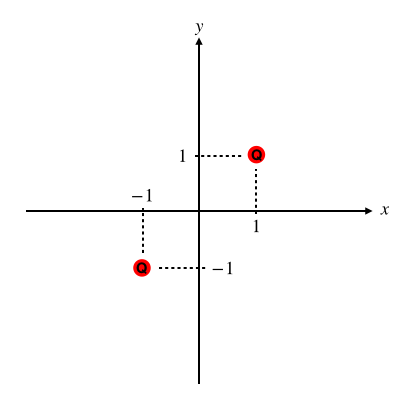

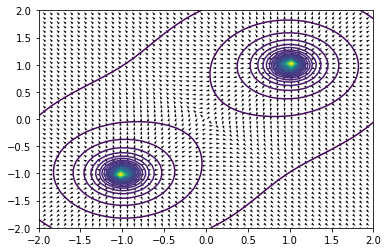

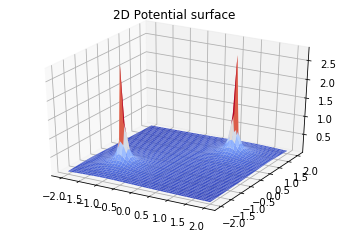

In [44]:
## Answer

%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#######################################################
# Part A (Equipotential lines & Electric field vectors)
#######################################################

"""
plot_2Defield(rc, q=1, perm=1.) is a function that plots the electric field vectors and equipotential lines of selected 2D charge configuration rc, where rc is a 2D array containing the position vectors r of every charge. (i.e. rc = [[r1], [r2], ...]). r is the position vector of the point charge in cartesian coordinates [x,y]. Input perm (permittivity of free space) and q (charge quantity) are optional and the default computational unit value 1.0 will be used.
"""

def pt_potential(r, X, Y, Q=1, Perm=1):
    assert X.ndim == Y.ndim == 2
    assert shape(X) == shape(Y)
    coeff = 1. / (4. * pi * Perm) # define coefficient 
    R = hypot((X - r[0]), (Y - r[1]))
    V = zeros(shape(X)) # initialising array
    V = coeff * Q / R

    return V

def pt_Efield(V):
    Ey, Ex = gradient(V) # gradient() uses NumPy/SciPy where indexing is ordered left to right (rows followed by columns). Thus the y-axis gradient (evaluated across rows) is returned first.
    ## Normalising arrows (for plot visualisation) & multiplying by negative (E=-grad(V))

    return [Ex, Ey]

def plot_2Defield(rc, q=1, perm=1):
    x = linspace(-2., 2., 50)
    y = linspace(-2., 2., 50)

    X, Y = meshgrid(x, y)

    ## initialising values
    V_res = zeros(shape(X))
    Ex_res = zeros(shape(X))
    Ey_res = zeros(shape(X))

    for i in range(len(rc)):
        V = pt_potential(rc[i], X, Y, Q=q, Perm=perm)
        V_res += V
        Ex, Ey = pt_Efield(V)
        Ex_res += Ex
        Ey_res += Ey
    
    fac = hypot(Ex_res, Ey_res)
    Ex_res = -2. * Ex_res / fac
    Ey_res = -2. * Ey_res / fac
    
    plt.contour(X, Y, V_res, 80)
    plt.quiver(X, Y, Ex_res, Ey_res)
    plt.show()

plot_2Defield([[-1., -1.], [1., 1.]]) ##reproduces the expected electric field and equipotential lines for the classic 2 point charges example.

#######################################################
# Part B (Potential surface plot)
#######################################################

"""
plot_2Dpotential(rc, q=1, perm=1.) is a function that plot the potential of selected 2D charge configuration rc, where rc is a 2D array containing the position vectors r of every charge. (i.e. rc = [[r1], [r2], ...]). r is the position vector of the point charge in cartesian coordinates [x,y]. Input perm (permittivity of free space) and q (charge quantity) are optional and the default computational unit value 1.0 will be used.
"""

def plot_2Dpotential(rc, q=1, perm=1):
    x = linspace(-2., 2., 50)
    y = linspace(-2., 2., 50)

    X, Y = meshgrid(x, y)

    ## initialising values
    V = zeros(shape(X))

    for i in range(len(rc)):
        V += pt_potential(rc[i], X, Y, Q=q, Perm=perm)
    
    ax = plt.figure(2).gca(projection = '3d')
    surf = ax.plot_surface(X, Y, V, cmap=cm.coolwarm, linewidth=1, antialiased='True')
    plt.title("2D Potential surface")
    plt.show()

plot_2Dpotential([[-1., -1.], [1., 1.]]) ##reproduces the expected 3D graph which peaks at the positions of the 2 positive point charges.

### B. Laplace's equation<a name="laplace"></a>
Laplace’s equation describes the potential in a charge-free region. This “charge-free” region can include any area between the charges we want, so we can use Laplace's equation for problems where the exact charge distribution is unknown. Let's start with the 2-dimensional equation:
<h3 align="center">$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0$</h3>

#### Finite difference method
Recall from the lectures that we can rewrite the 2<sup>nd</sup> derivative using finite difference as
<h3 align="center">$\frac{\partial^2 V}{\partial x^2} = \frac{V_{i+1} \, - \, 2V_{i} \, + \, V_{i-1}}{\Delta x^2}$</h3>

Thus, the 2-dimensional laplace's equation can be re-expressed to be
<h3 align="center">$V_{i,j}=\frac{1}{4}[V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1}]$</h3>

Thus, with finite difference, we can see that the solution to laplace’s equation is such that the potential V at each point in space is just the average of the potential in its surrounding points. This has one very important implication in electrostatics: it means that there are no local minima or maxima of V in charge-free regions. See David J. Griffiths. Introduction to Electrodynamics. Prentice-Hall, Upper Saddle River, third edition, 1999.

#### Method of relaxation
The method of relaxation is a way to solve for the potential in a charge-free region defined by the finite difference laplace's equation. The general algorithm is as follows:
1. Populate your solution grid with some initial guess of what the solution should look like. Anything works — zero is fine — but if you have even a coarse estimate of the solution you can save quite a bit of calculation time by starting with that.
2. Iterate through your grid points, recalculating each point to be the average of the surrounding points.
3. As you iterate, keep track of how much the solution change. When the largest change is less than a set tolerance, stop.

Of course there are some subtle — or not-so-subtle — points to keep track of when using the relaxation method. First, you need to make sure that the area of space in which your calculations take place is actually bounded. In other words, make sure that the boundary of the area you’re relaxing is set to some fixed potential. Zero usually works well, and the easiest way of ensuring this is to initially set your guess to something that has zero on all the boundaries, then not re-calculating the boundary elements. Second, your solutions are going to be very boring unless there are some fixed potential points inside the area. Don’t recalculate the potential at those points! They’re supposed to be fixed.

#### Dirichlet boundary conditions
Solutions to a partial differential equation such as the laplace's equation involves solving a boundary value problem. There are various boundary conditions but for this course, we will focus on the dirichlet boundary conditions. Let us consider the side view of a parallel plate capacitor in the figure below. Under dirichlet boundary conditions, the potential takes on a value at each boundary:

<img src="figures/para_plate.jpg" width=250, height=250/>

Setting the parameters of the geometry to within reasonable limits in accordance with the figure shown, plot the potential for the region surrounding the 2 plates and show the resultant electric field.

Number of iterations: 10001
Error: 0.15077915011673715


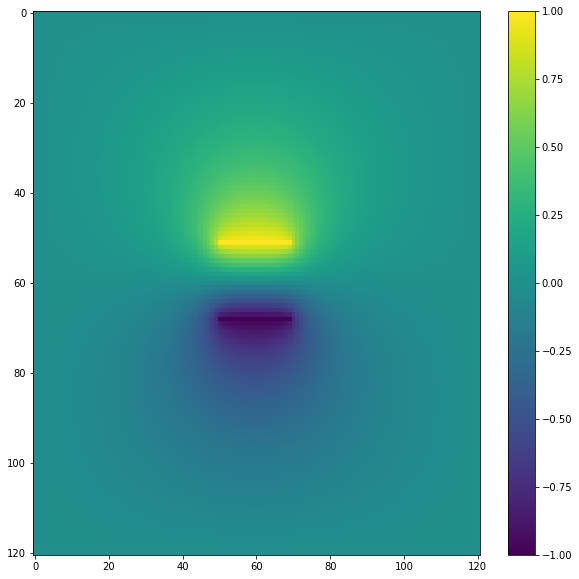

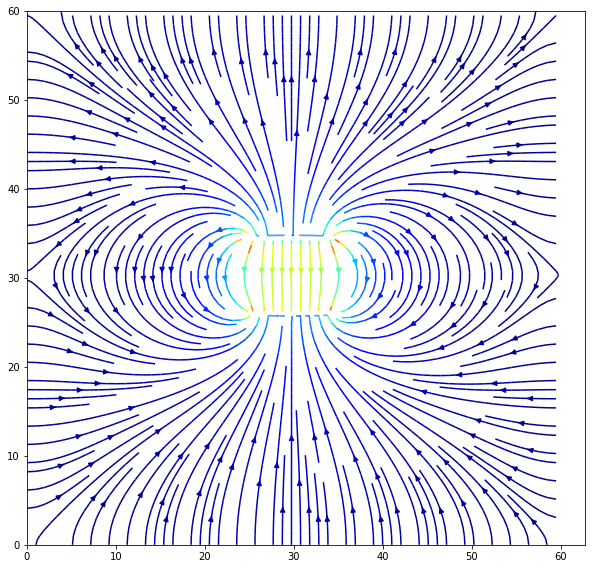

In [46]:
from scipy import *
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## setting up the grid points
Lx = 60
Ly = 60.
deltax = deltay = .5

x_pts = int(Lx/deltax + 1)
y_pts = int(Ly/deltay + 1)

x = linspace(0., Lx, x_pts)
y = linspace(0., Ly, y_pts)

## initialising working arrays
V = zeros([x_pts,y_pts])
V_working = copy(V)

## Dirichlet boundary conditions
V[0,:] = 0 # bottom boundary / top matrix
V[-1,:] = 0 # top boundary / bottom matrix
V[:,0] = 0 # left
V[:,-1] = 0 # right

## Parallel plates voltages
V[-(x_pts//2-8), y_pts//2-10:y_pts//2+10] = 1
V[(x_pts//2-8), y_pts//2-10:y_pts//2+10] = -1

## initialising iterator parameters
upp_bound_err = 1.e-3
max_i = 1.e4
err = 1.0
i = 0

## relaxation method
while (err > upp_bound_err):
    V_working[1:-1,1:-1] = .25 * (V[1:-1,2:] + V[1:-1,:-2] +V[2:,1:-1] + V[:-2,1:-1])
    err = amax(abs( V_working[1:-1,1:-1] - V[1:-1,1:-1] ))

    i += 1
    if i > max_i:
        break
    V = copy(V_working)

    ## resetting boundary conditions and parallel plates voltages
    V[0,:] = 0 # bottom boundary / top matrix
    V[-1,:] = 0 # top boundary / bottom matrix
    V[:,0] = 0 # left
    V[:,-1] = 0 # right
    V[-(x_pts//2-8), y_pts//2-10:y_pts//2+10] = 1
    V[(x_pts//2-8), y_pts//2-10:y_pts//2+10] = -1

print("Number of iterations: " + str(i))
print("Error: " + str(err))

## e-field
Ey, Ex = gradient(V)
fac = hypot(Ex, Ey)
Ex = -Ex
Ey = -Ey

## plotting
#matplotlib.rcParams['xtick.direction'] = 'out'
#matplotlib.rcParams['ytick.direction'] = 'out'

X, Y = meshgrid(x, y)
plt.figure(figsize=(10,10))
plt.imshow(flipud(V), cmap='viridis', aspect="auto")
plt.colorbar()

plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
#plt.quiver(X, Y, Ex, Ey, angles='xy', scale_units='xy', scale=.2)
plt.streamplot(X, Y, Ex, Ey, 2, color = fac, cmap = 'jet')

#### Over-relaxation
We can speed up the relaxation method considerably by using _over-relaxation_. At each point on the grid, calculate the new value of $V$ as before, but instead of assigning the new value to the grid point, determine the change in $V$:
<h3 align="center">$∆V = V_{new} − V_{old}$</h3>
Multiply this $∆V$ by some factor $α$, and add the result to the original value of $V$ to get its new value at that point.
<h3 align="center">$V_{new} = α∆V + V_{old}$</h3>
The reason this method is faster is that $V$ moves farther each step. It may move past the “correct” value, but then it will just move back in the next step. Overall, the solution converges faster.

The factor $α$ should be between 1 and 2. $α = 1$ corresponds to the regular relaxation algorithm, so there’s no benefit. Values of $α$ greater than 2 cause the algorithm to become unstable: V will oscillate from step to step without converging on the solution. The optimal value of $α$ depends on the geometry of the problem. For 2D rectangular grids, $α$ can be determined using the following relation:
<h3 align="center">$α = \frac{2-\sqrt{4-t^2}}{t^2}$</h3>
where 
<h3 align="center">$t = cos(\frac{\pi}{N_x})+cos(\frac{\pi}{N_y})$</h3>
and $N_x$ and $N_y$ denote the number of grid points in the x and y direction respectively. (M. N. O. Sakidu, Numerical Techniques in Electromagnetics, 2nd ed. Boca
Raton, Fl: CRC Press, 2001.)

### C. Poisson's equation<a name="poisson"></a>
Poisson’s equation describes the potential in a region with charge distribution. The 2-dimensional equation is closely similar to the one for laplace's in the previous section.
<h3 align="center">$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = -\frac{\rho}{\epsilon}$</h3>

Re-expressing the differential equation using finite difference leads to:
<h3 align="center">$V_{i,j}=\frac{1}{4}[V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1}+h^2\frac{\rho}{\epsilon}]$</h3>

where we have chosen the inter-grid spacing $\Delta x = \Delta y = h$

Now, try using the method of relaxation to solve for the following simple example with dirichlet boundary conditions.
<img src="figures/poisson_1.jpg" width=250, height=250/>
Setting the parameters of the geometry to within reasonable limits in accordance with the figure shown, plot the potential for the region surrounding the uniform charge distribution and show the resultant electric field.

Number of iterations: 10001
Error: 0.02838679360320384


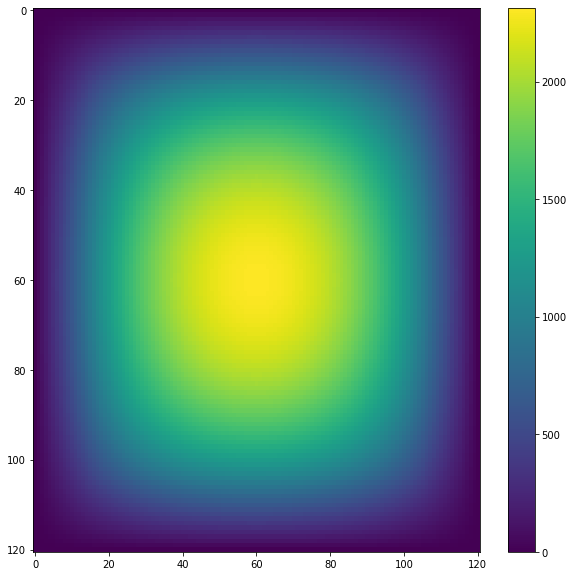

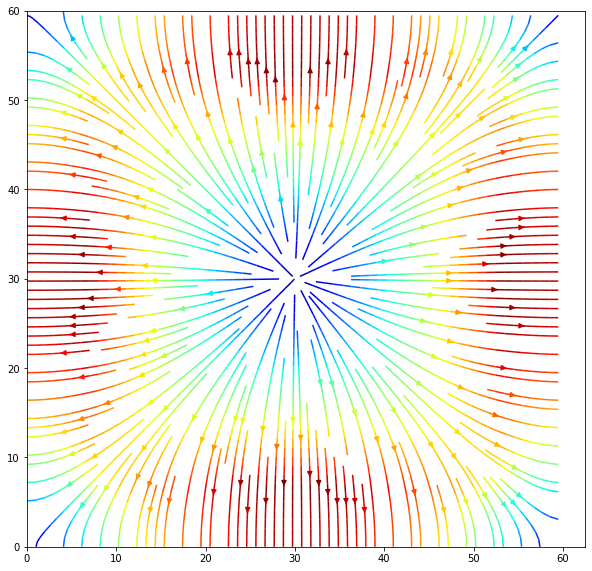

In [47]:
from scipy import *
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## setting up the grid points
Lx = 60
Ly = 60.
deltax = deltay = .5

x_pts = int(Lx/deltax + 1)
y_pts = int(Ly/deltay + 1)

x = linspace(0., Lx, x_pts)
y = linspace(0., Ly, y_pts)

## initialising working arrays
V = zeros([x_pts,y_pts])
V_working = copy(V)

## Dirichlet boundary conditions
V[0,:] = 0 # bottom boundary / top matrix
V[-1,:] = 0 # top boundary / bottom matrix
V[:,0] = 0 # left
V[:,-1] = 0 # right

## initialising iterator parameters
upp_bound_err = 1.e-3
max_i = 1.e4
err = 1.0
i = 0

## declaring charge distribution
rho = zeros([x_pts,y_pts])
rho[15:-15 ,15:-15] = 10 # charge distribution

## over-relaxation method
while (err > upp_bound_err):
    V_working[1:-1,1:-1] = .25 * (V[1:-1,2:] + V[1:-1,:-2] +V[2:,1:-1] + V[:-2,1:-1] + ((deltax**2)*rho[1:-1,1:-1]))
    err = amax(abs( V_working[1:-1,1:-1] - V[1:-1,1:-1] ))

    i += 1
    if i > max_i:
        break
    V = copy(V_working)

    ## resetting boundary conditions and parallel plates voltages
    V[0,:] = 0 # bottom boundary / top matrix
    V[-1,:] = 0 # top boundary / bottom matrix
    V[:,0] = 0 # left
    V[:,-1] = 0 # right

print("Number of iterations: " + str(i))
print("Error: " + str(err))

## e-field
Ey, Ex = gradient(V)
fac = hypot(Ex, Ey)
Ex = -Ex
Ey = -Ey

## plotting
#matplotlib.rcParams['xtick.direction'] = 'out'
#matplotlib.rcParams['ytick.direction'] = 'out'

X, Y = meshgrid(x, y)
plt.figure(figsize=(10,10))
plt.imshow(flipud(V), cmap='viridis', aspect="auto")
plt.colorbar()

plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
#plt.quiver(X, Y, Ex, Ey, angles='xy', scale_units='xy', scale=.2)
plt.streamplot(X, Y, Ex, Ey, 2, color = fac, cmap = 'jet')

# 3. Magnetostatics<a name="magnetostatics"></a>

Exercise 6) Consider a circular, infinitesimally thin loop of radius R, carrying current I, centered at the
origin and parallel to the xy plane. According to the Biot-Savart law, in cylindrical coordinates, the magnetic field at point $\vec{r} = x \hat{i} + y \hat{j} + z \hat{k}$ is
<h3 align="center">$\vec{B} = \frac{\mu_{0}IR}{4\pi}\int_{0}^{2\pi}\frac{(z\sin{\phi})\hat{\rho}+(R-\rho\sin{\phi})\hat{z}}{\left(R^{2}+\rho^{2}+z^{2}-2\rho R\sin{\phi}\right)^{\frac{3}{2}}}d\phi$</h3>

where $\mu_{0}$ is the permeability of free space. (Are you able to prove it?) We take $\mu_{0}$ to have the computational unit of 1.

<img src="figures/circular_coil.png" width=400, height=400/>

Calculate the magnetic field produced by the coil at a point $\vec{r}$ relative to the center of the loop, and plot how $B_{z}$ varies with $z$.

[0.01237887 0.01237887 0.00123359]


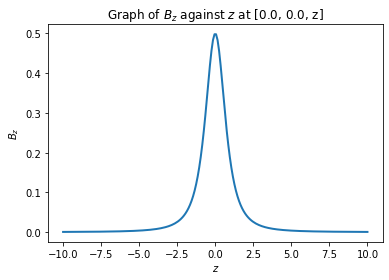

In [48]:
## Answer

%matplotlib inline
from scipy import *
from scipy import integrate
import matplotlib.pyplot as plt

"""
Coil_Bfield(r, current, radius, perm=1.) is a function that calculates the magnetic field 
produced by the coil at a point r relative to the center of the loop. 
It takes input of r in cartesian [x,y,z]; current; radius (of coil) and outputs B (magnetic field) 
in cylindrical coordinates [rho, phi, z]. Dimensions are in SI units unless specified. 
Input perm (permeability of free space) is optional and the default computational unit value 1.0 will be used.
"""

## First, convert cartesian coordinates to cylindrical coordinates, in accordance with Biot-Savart law
def cart2cyl(r):
    x = r[0]
    y = r[1]
    z = r[2]
    rho = sqrt(x**2 + y**2)
    phi = arctan2(y, x)

    return [rho, phi, z]

## Converting cylindrical coordinates back to cartesian, 
## we make use of the position vector r instead of converting directly from B 
## because B has no phi dependence (0) as reflected in the Biot-Savart law
def cyl2cart(BRho, r):
    theta = arctan2(r[1], r[0])
    Bx = BRho * cos(theta)
    By = BRho * sin(theta)

    return [Bx, By]

## Define integrand to be integrated, there are rho and z components
def intRho(phi, rho, z, radius):
    denom = ((radius ** 2) + (rho ** 2) + (z ** 2) - (2 * rho * radius * sin(phi))) ** (3/2)
    return z * sin(phi) / denom

def intZ(phi, rho, z, radius):
    denom = ((radius ** 2) + (rho ** 2) + (z ** 2) - (2 * rho * radius * sin(phi))) ** (3/2)
    return (radius - rho * sin(phi)) / denom

## Calculating B-field
def Coil_Bfield(r, current, radius, perm=1):
    r = array(r)
    assert r.ndim == 1
    [rho, phi, z] = cart2cyl(r)
    coeff = perm * current * radius / (4 * pi) # define coefficient 
    upplim = 2 * pi # upper limit of integration
    lowlim = 0. # lower limit of integration

    ## Computing integral, there are rho and z components
    integralRho = integrate.quad(intRho, lowlim, upplim, (rho, z, radius))
    integralZ = integrate.quad(intZ, lowlim, upplim, (rho, z , radius))

    BRho = coeff * integralRho[0]
    [BX, BY] = cyl2cart(BRho, r)
    BZ = coeff * integralZ[0]
    B = array([BX, BY, BZ])

    return B

print(Coil_Bfield([1., 1., 1.], 1, 0.5))

"""
BZ_plot(B) is a function that plots the relationship of the z-component of the magnetic field with z. 
It takes input of x and y (relative to the center of the coil), current, radius and outputs a graph of B_z against z.
"""

def BZ_plot(x, y, current, radius):
    z_max = 10. # max z value on graph axis
    z_min = -10. # min z value on graph axis
    z = linspace(z_min, z_max, 200)
    BZ = zeros(len(z)) # initialising BZ array

    ## Solving for BZ values
    for i in range(len(z)):
        r = [x, y, z[i]]
        B = Coil_Bfield(r, current, radius)
        BZ[i] = B[2]
    
    ## Outputing graph
    plt.title("Graph of $B_z$ against $z$ at [" + str(x) + ", " + str(y) + ", z]")
    plt.xlabel("$z$")
    plt.ylabel("$B_z$")
    plt.plot(z, BZ, linewidth=2)
    plt.show()

BZ_plot(0., 0., 1., 1.)

Exercise 7) Consider a Helmholtz coil, consisting of two parallel circular loops from the example above, separated by distance $L$ with the origin exactly between the two loops. Each loop carrys equal current $I$ in the same direction.

<img src="figures/helmholtz.png" width=400, height=400/>

Generate a plot that shows the relationship between $B_z$ and $\rho$. Can you comment on the behaviour of the magnetic field at $z = 0$ for $R = L$, $R < L$ and $R > L$? What about the behaviour of the magnetic field for $z \neq 0$.

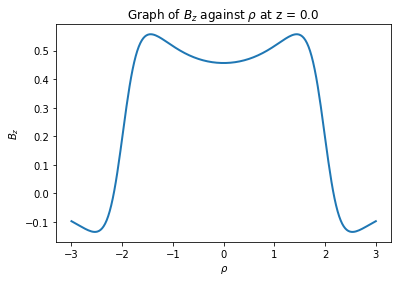

In [49]:
## Answer

"""
Helmholtz_Bfield(z, current, radius, distance) is a function that calculates the magnetic field 
produced by 2 coils at a point r relative to the center between the 2 loops. 
It takes input of z; current; radius (of coil); distance (between the 2 coils). 
It outputs a plot that shows the relationship betwen the z component of the magnetic field and 
the radial cylindrical coordinate (rho).
"""

def Helmholtz_Bfield(z, current, radius, distance):
    rho_max = 1.5 * radius # max rho value
    rho_min = -1.5 * radius # min rho value
    rho = linspace(rho_min, rho_max, 200)
    BZ = zeros(len(rho)) # initialising BZ array

    ## Solving for BZ values
    for i in range(len(rho)):
        r1 = [rho[i], 0., z + distance / 2] 
        # simple to let x be rho and y be 0 with no phi (angular) dependence. 
        # Appropriate transformation done to shift the centre of each loop along the z-axis to the origin.
        r2 = [rho[i], 0., z - distance / 2]
        B = Coil_Bfield(r1, current, radius) + Coil_Bfield(r2, current, radius)
        BZ[i] = B[2]
    
    ## Outputing graph
    plt.title(r"Graph of $B_z$ against $\rho$ at z = " + str(z))
    plt.xlabel(r"$\rho$")
    plt.ylabel("$B_z$")
    #plt.xlim(,) # setting the rho limit on graph axis 
    plt.plot(rho, BZ, linewidth=2)
    plt.show()

Helmholtz_Bfield(0., 1., 2., 1.)